In [1]:
import numpy as np
from scipy.constants import c
from tqdm.notebook import tqdm
import h5py as hp
import matplotlib.pyplot as plt
from aps_figures.aps_one_column import *
from FITX import fit_risetime
from machine_data.TDR2 import *
from postprocessing import *
from mbtrack2 import Synchrotron, Electron
from mbtrack2.utilities import Optics
from machine_data.soleil import v2366, v2366_v2

/home/gubaidulin/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/gubaidulin/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


mbtrack2 version 0.5.0.87
--------------------------------------------------
If used in a publication, please cite mbtrack2 paper and the zenodo archive for the corresponding code version (and other papers for more specific features).
[1] A. Gamelin, W. Foosang, N. Yamamoto, V. Gubaidulin and R. Nagaoka, “mbtrack2”. Zenodo, Mar. 25, 2024. doi: 10.5281/zenodo.10871040.
[2] A. Gamelin, W. Foosang, and R. Nagaoka, “mbtrack2, a Collective Effect Library in Python”, presented at the 12th Int. Particle Accelerator Conf. (IPAC'21), Campinas, Brazil, May 2021, paper MOPAB070.




In [2]:
ring2 = v2366(IDs='close', load_lattice=False)
chro = [1.6, 1.6]
ring = Synchrotron(h=ring2.h, optics=ring2.optics, particle=Electron(), L=ring2.L, E0=ring2.E0, ac=ring2.ac, 
                   U0=ring2.U0, tau=ring2.tau, emit=ring2.emit, tune=ring2.tune, 
                   sigma_delta=ring2.sigma_delta, sigma_0=ring2.sigma_0, chro=chro)
Q_S = ring.synchrotron_tune(1.8e6)

In [22]:
%matplotlib inline
n_macroparticles=1e6
n_turns = 5.0e4 
n_bin = 100
bunch_current = 1.2e-3
Qp_x = 1.6
Qp_y = 1.6 #np.linspace(0.1, 5.0, 50)
Qp = 1.6
max_kick = 0
ID_state = 'close'
Zlong='True'
cavity='True'
# tmci_current = 1e-3*np.linspace(0.1, 5, 50)
tmci_current  = 1e-3*np.linspace(0.2, 7, 35)
# tmci_current  = 1e-3*np.linspace(0.2, 10, 50)
risetimes = []
peak_freqsarr = []
peak_ampsarr = []
sigmas_dp = []
sigmas_dp_min = []
sigmas_dp_max = []

sigmas_z = []
ring2 = v2366(IDs=ID_state, load_lattice=False)

ring = Synchrotron(h=ring2.h, optics=ring2.optics, particle=Electron(), L=ring2.L, E0=ring2.E0, ac=ring2.ac, 
                   U0=ring2.U0, tau=ring2.tau, emit=ring2.emit, tune=ring2.tune, 
                   sigma_delta=ring2.sigma_delta, sigma_0=ring2.sigma_0, chro=chro)
for bunch_current in tqdm(tmci_current):
    try:
        risetime, peak_freqs, peak_amps, final_energy_offset, max_energy_offset, min_energy_offset, final_bunch_length = post_single(n_macroparticles,
                n_turns, 
                n_bin,
                bunch_current, 
                Qp,
                Qp,
                ID_state,
                Zlong,
                cavity,
                max_kick)
    except:
        risetime = peak_freqs = peak_amps = final_energy_offset = max_energy_offset = min_energy_offset = final_bunch_length = np.nan
    risetimes.append(risetime)
    peak_freqsarr.append(peak_freqs)
    peak_ampsarr.append(peak_amps)
    sigmas_dp.append(final_energy_offset)
    sigmas_z.append(final_bunch_length)    
    sigmas_dp_min.append(min_energy_offset)
    sigmas_dp_max.append(max_energy_offset)

  0%|          | 0/35 [00:00<?, ?it/s]

In [23]:
risetimes = np.array(risetimes)
indices = np.isnan(risetimes)
print(risetimes[indices])
risetimes[np.isnan(risetimes)] = np.inf
sigmas_dp = np.array(sigmas_dp)
sigmas_z = np.array(sigmas_z)
sigmas_dp_min = np.array(sigmas_dp_min)
sigmas_dp_max = np.array(sigmas_dp_max)
sigmas_dp[np.isnan(sigmas_dp)] = np.inf
sigmas_dp_min[np.isnan(sigmas_dp_min)] = np.inf
sigmas_dp_max[np.isnan(sigmas_dp_max)] = np.inf

# risetimes_FB = risetimes

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]


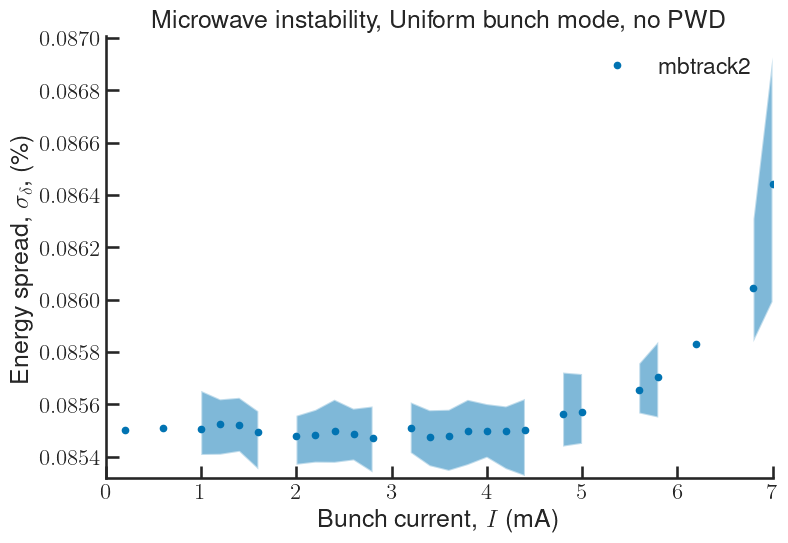

In [24]:
plt.plot(tmci_current*1e3, 100*sigmas_dp, lw=0, marker='.', label="mbtrack2")
plt.fill_between(tmci_current*1e3, 100*sigmas_dp_min, 100*sigmas_dp_max, alpha=0.5)

plt.xlabel("Bunch current, $I$ (mA)")
plt.ylabel('Energy spread, $\sigma_\delta$, (\%)')

plt.title('Microwave instability, Uniform bunch mode, no PWD')
plt.xlim(0, max(1e3*tmci_current))
plt.ylim(ring.sigma_delta*94, )
plt.legend(loc='upper right')
plt.savefig('../../data/processed/mwi_current_416@500mA_pwd_hc.png')
plt.savefig('../../data/processed/mwi_current_416@500mA_pwd_hc.pdf')